In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import SVR from sklearn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes

# Display plots inline
%matplotlib inline


In [5]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert the dataset into a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target

# Display the first few rows of the DataFrame
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


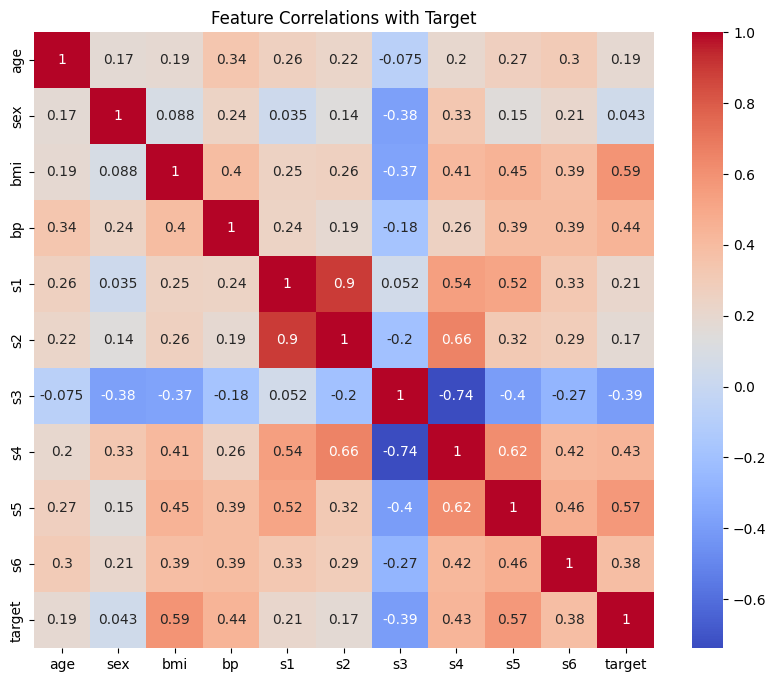

In [6]:
# Summary statistics of the dataset
df.describe()

# Visualize correlations between features and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations with Target')
plt.show()
#This cell provides basic descriptive statistics for the dataset and visualizes correlations to understand how each feature correlates with the target.



In [7]:
# Define X (features) and y (target)
X = df.drop('target', axis=1)
y = df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# We standardize the features using StandardScaler because SVR performs better when the data is scaled. Then, we split the dataset into training and test sets.


In [9]:
# Initialize the SVR model with RBF kernel
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)


In [10]:
# Calculate Mean Squared Error (MSE) and R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
#We compute the Mean Squared Error (MSE) and R-squared (R²) to evaluate the performance of the SVR model. MSE measures the average squared difference between actual and predicted values, while R² measures how well the model explains the variability in the data.

Mean Squared Error (MSE): 2602.8725119643955
R-squared (R²): 0.5087206566529245


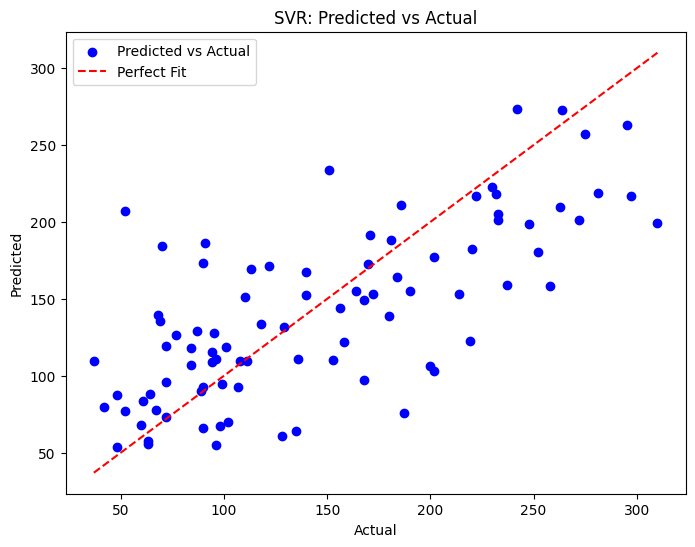

In [11]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Predicted vs Actual')
plt.legend()
plt.show()